# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [64]:
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

units = "imperial"

query_url = f"{base_url}{cities[0]}&appid={weather_api_key}&units={units}"

test_cities = cities[:10]

maxtemp = []
humidity = []
cloudiness = []
windspeed = []
cities_names = []
lat = []
lng = []
country = []
date = []

print("Beginning Data Retrieval")
print("----------------------------")
for x in range(len(test_cities)): 
    query_url = f"{base_url}{test_cities[x]}&appid={weather_api_key}&units={units}"
    
    weather_data = requests.get(query_url).json()
    try:
        maxtemp.append(weather_data["main"]["temp_max"])
        humidity.append(weather_data["main"]["humidity"])
        cloudiness.append(weather_data["clouds"]["all"])
        windspeed.append(weather_data["wind"]["speed"])
        lat.append(weather_data["coord"]["lat"])
        lng.append(weather_data["coord"]["lon"])
        country.append(weather_data["sys"]["country"])
        cities_names.append(test_cities[x])
        date.append(weather_data["dt"])
        
        print(f"Processing Record {x + 1} of set 1 | {test_cities[x]}")
        
        time.sleep(1)
        
    except:
        print(f"City not found skipping...")


Beginning Data Retrieval
----------------------------
Processing Record 1 of set 1 | abonnema
Processing Record 2 of set 1 | remedios
Processing Record 3 of set 1 | butaritari
Processing Record 4 of set 1 | cape town
Processing Record 5 of set 1 | port-gentil
Processing Record 6 of set 1 | ribeira grande
Processing Record 7 of set 1 | pemangkat
Processing Record 8 of set 1 | mehamn
City not found skipping...
Processing Record 10 of set 1 | pajapan


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [65]:
weather_df = pd.DataFrame({"City": cities_names,
                          "Lat": lat,
                          "Lng": lng,
                          "Max Temp": maxtemp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": windspeed,
                          "Country": country,
                          "Date": date})
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,abonnema,4.7084,6.7931,80.73,81,32,6.89,NG,1613087708
1,remedios,22.4947,-79.5458,78.80,69,40,13.80,CU,1613087709
2,butaritari,3.0707,172.7902,81.99,76,59,13.87,KI,1613087532
3,cape town,-33.9258,18.4232,72.00,94,20,10.36,ZA,1613087712
4,port-gentil,-0.7193,8.7815,82.40,89,40,8.05,GA,1613087713
5,ribeira grande,38.5167,-28.7000,61.47,80,99,38.03,PT,1613087548
6,pemangkat,1.1667,108.9667,77.18,89,100,9.13,ID,1613087716
7,mehamn,71.0357,27.8492,22.24,92,78,10.94,NO,1613087630
8,pajapan,18.2500,-94.7000,93.20,40,1,6.91,MX,1613087718


In [66]:
outfile = "../output_data/cities.csv"
weather_df.to_csv(outfile, index=False)
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000e+00
mean,13.844200,15.628678,72.223333,78.888889,52.111111,13.108889,1.613088e+09
std,29.215066,84.327829,20.594826,16.691648,34.552295,9.701185,7.608457e+01
min,-33.925800,-94.700000,22.240000,40.000000,1.000000,6.890000,1.613088e+09
25%,1.166700,-28.700000,72.000000,76.000000,32.000000,8.050000,1.613088e+09
50%,4.708400,8.781500,78.800000,81.000000,40.000000,10.360000,1.613088e+09
75%,22.494700,27.849200,81.990000,89.000000,78.000000,13.800000,1.613088e+09
max,71.035700,172.790200,93.200000,94.000000,100.000000,38.030000,1.613088e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [67]:
data_file = "../output_data/cities.csv"
city_data = pd.read_csv(data_file)
city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,abonnema,4.7084,6.7931,80.73,81,32,6.89,NG,1613087708
1,remedios,22.4947,-79.5458,78.80,69,40,13.80,CU,1613087709
2,butaritari,3.0707,172.7902,81.99,76,59,13.87,KI,1613087532
3,cape town,-33.9258,18.4232,72.00,94,20,10.36,ZA,1613087712
4,port-gentil,-0.7193,8.7815,82.40,89,40,8.05,GA,1613087713
5,ribeira grande,38.5167,-28.7000,61.47,80,99,38.03,PT,1613087548
6,pemangkat,1.1667,108.9667,77.18,89,100,9.13,ID,1613087716
7,mehamn,71.0357,27.8492,22.24,92,78,10.94,NO,1613087630
8,pajapan,18.2500,-94.7000,93.20,40,1,6.91,MX,1613087718


In [68]:
#  Get the indices of cities that have humidity over 100%.
index100 = weather_df.loc[weather_df["Humidity"] > 80, :].index
index

Int64Index([3, 4, 6, 7], dtype='int64')

In [69]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(index=index100)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,remedios,22.4947,-79.5458,78.80,69,40,13.80,CU,1613087709
2,butaritari,3.0707,172.7902,81.99,76,59,13.87,KI,1613087532
5,ribeira grande,38.5167,-28.7000,61.47,80,99,38.03,PT,1613087548
8,pajapan,18.2500,-94.7000,93.20,40,1,6.91,MX,1613087718


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [70]:
# function to create plots
def createPlots(x_param, y_param, title, xlabel, ylabel):
    clean_city_data.plot(x_param, y_param, kind="scatter")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

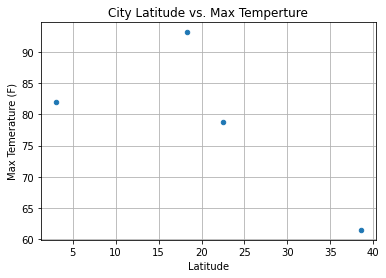

In [71]:
x = "Lat"
y = "Max Temp"
title = "City Latitude vs. Max Temperture"
xlabel = "Latitude"
ylabel = "Max Temerature (F)"
createPlots(x, y, title, xlabel, ylabel)

## Latitude vs. Humidity Plot

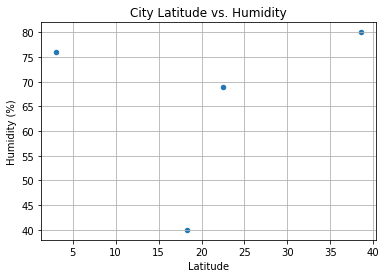

In [72]:
x = "Lat"
y = "Humidity"
title = "City Latitude vs. Humidity"
xlabel = "Latitude"
ylabel = "Humidity (%)"
createPlots(x, y, title, xlabel, ylabel)

## Latitude vs. Cloudiness Plot

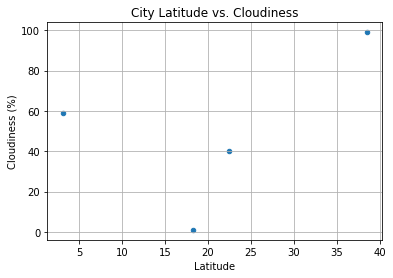

In [73]:
x = "Lat"
y = "Cloudiness"
title = "City Latitude vs. Cloudiness"
xlabel = "Latitude"
ylabel = "Cloudiness (%)"
createPlots(x, y, title, xlabel, ylabel)

## Latitude vs. Wind Speed Plot

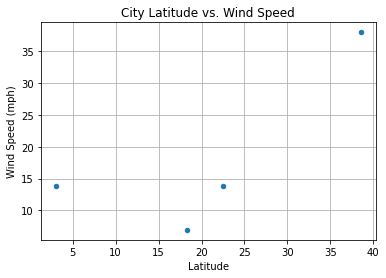

In [74]:
x = "Lat"
y = "Wind Speed"
title = "City Latitude vs. Wind Speed"
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
createPlots(x, y, title, xlabel, ylabel)

## Linear Regression

In [75]:
northern_data = clean_city_data.loc[clean_city_data["Lat"] >= 0, :]
southern_data = clean_city_data.loc[clean_city_data["Lat"] <= 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression